FIAP - Tecnólogo em Sistema para Internet 

# Aula 14 - KNN

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Importar o dataset

In [3]:
tabela = datasets.load_wine()

In [5]:
entradas = tabela.data
saidas = tabela.target

In [6]:
entradas[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

# Dividir o dataset em TREINO e TESTE

In [7]:
X_train, X_test, y_train, y_test = train_test_split(entradas, 
                                                    saidas, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [8]:
print("N dados = ", len(entradas))
print("X_train = ", len(X_train))
print("X_test = ", len(X_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

N dados =  178
X_train =  124
X_test =  54
y_train =  124
y_test =  54


# Criar o modelo SEM normalização dos dados

## Primeiro modelo, com k=5

In [9]:
# Definir o modelo
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o modelo
knn.fit(X_train, y_train)

# Avaliar o modelo
y_pred = knn.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

print(f"Acurácia: {acc:.4f}")

Acurácia: 0.7407


# Modelo genérico, via função

In [14]:
def meu_knn(X_train, X_test, y_train, y_test, k=0):
    
    # Definir o modelo
    if k == 0:
        k = int( (len(y_train) + len(y_test)) ** 0.5 )
    
    
    knn = KNeighborsClassifier(n_neighbors=k)

    # Treinar o modelo
    knn.fit(X_train, y_train)

    # Avaliar o modelo
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)

    print(f"k={k}\tAcurácia: {acc:.4f}")

In [15]:
meu_knn(X_train, X_test, y_train, y_test, 5)

k=5	Acurácia: 0.7407


In [16]:
meu_knn(X_train, X_test, y_train, y_test, 7)

k=7	Acurácia: 0.7593


In [17]:
meu_knn(X_train, X_test, y_train, y_test)

k=13	Acurácia: 0.7593


# Criar o modelo COM normalização dos dados

## Normalizar pelo valor MIN e MAX

In [18]:
# Normalizar os dados
norm = MinMaxScaler()

X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [19]:
# Avaliar o modelo
meu_knn(X_train_norm, X_test_norm, y_train, y_test)

k=13	Acurácia: 0.9815


In [21]:
meu_knn(X_train_norm, X_test_norm, y_train, y_test, k=5)

k=5	Acurácia: 0.9444


## Padronizando os dados com DESVIO PADRÃO

In [22]:
# Padronizando os dados
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Avaliar o modelo
meu_knn(X_train_scaled, X_test_scaled, y_train, y_test)

k=13	Acurácia: 0.9630


## Verificando a distribuição dos dados

In [24]:
df = pd.DataFrame(X_train, columns=tabela.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
1,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
2,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
3,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
4,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
120,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
121,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
122,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


<AxesSubplot:ylabel='Frequency'>

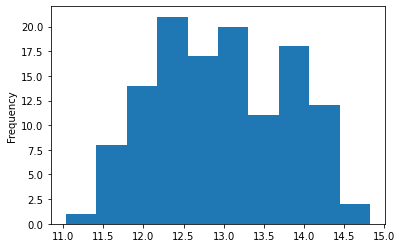

In [26]:
df["alcohol"].plot.hist()

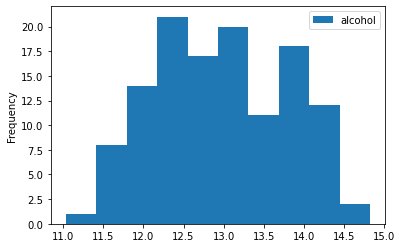

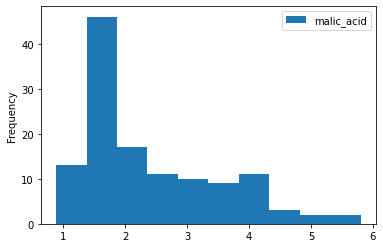

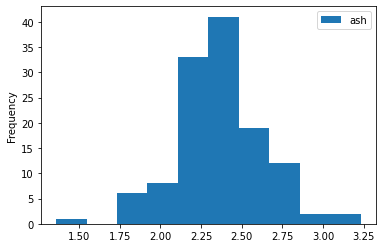

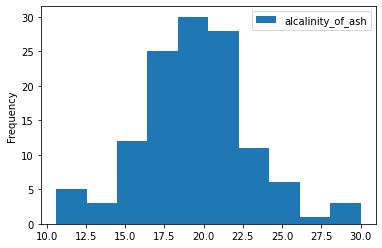

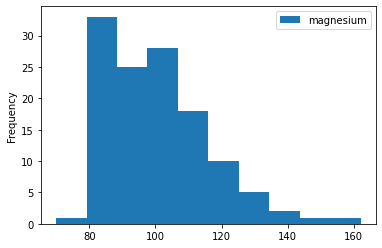

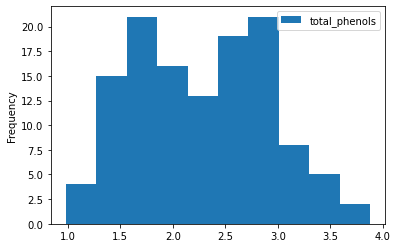

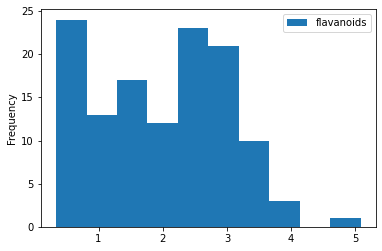

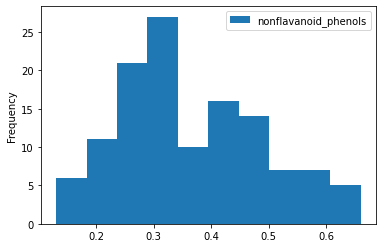

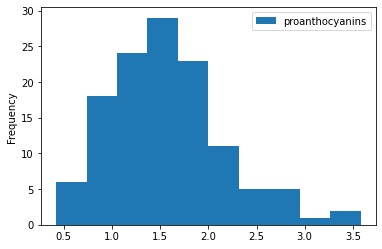

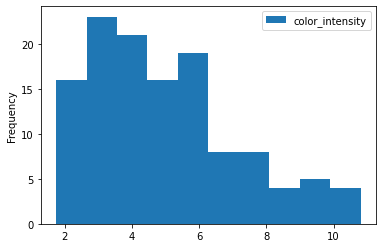

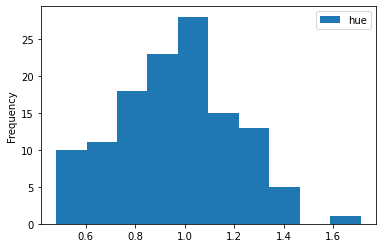

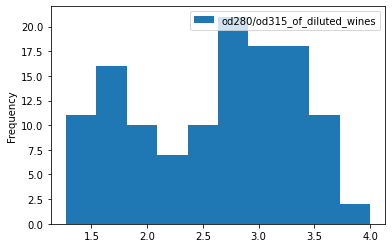

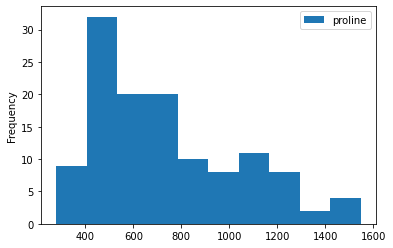

In [28]:
import matplotlib.pyplot as plt

for coluna in df.columns:
    df[coluna].plot.hist( legend=True )
    plt.show()

# Exercício! Faça o KNN sobre a base Fertility

Base disponível no Teams >> Notebooks >> DATASETS

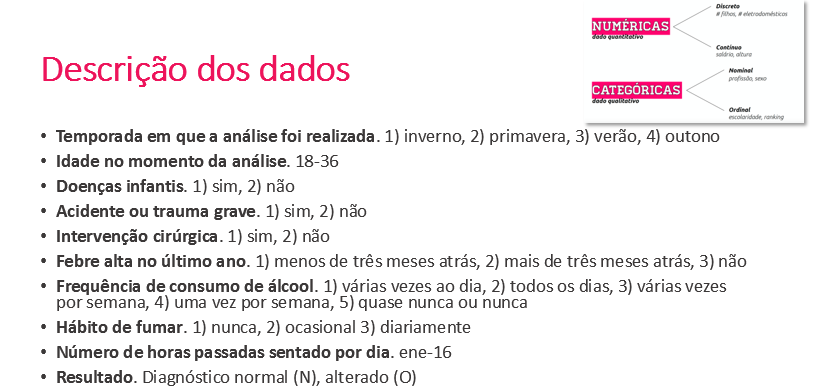

In [ ]:
import pandas as pd
colunas = ["temporada", "idade", "doenças infantis", "acidente", 
           "cirurgia", "febre", "alcool", "fumo", "horas_sentado", 
           "output"]
df = pd.read_csv(r"DATASETS\fertility_Diagnosis.txt", header=None)
df.columns = colunas

In [ ]:
df.head()

## Resolução

- Todos os dados são numéricos, exceto o Label, então vamos transformá-lo em 0-1, sendo: N=0; O=1
- Feito isso, separamos os dados em Treino e Teste, usando uma proporção pertinente. Ex: 70/30%
- Normalizamos os dados
- Aplicamos o KNN
- Medimos os resultados

Vemos que nenhuma feature segue a distribuição normal, então é melhor normalizar pelo "MinMax".

A primeira execução usa a normalização (min/max), a segunda usa a padronização (desvio padrão).

In [ ]:
# Avaliar o modelo


# Avaliar o modelo


Já para o K ideal, a forma de padronizar os dados é indiferente:

In [ ]:
# Avaliar o modelo


# Avaliar o modelo
